In [1]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA

plt.rcParams["figure.figsize"] = (15,6)

In [3]:
df = pd.read_csv("data/open_tasks_Corn_EKV_DE.csv")
df_aug = pd.read_csv("data/augmented_open_tasks_Corn_EKV.csv")

In [4]:
# Remove empty descriptions
data = df[df["word_count"] > 0]["description"]
data_aug = df_aug["description"]
len(data), len(data_aug)

(130, 260)

In [5]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/faten/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
german_stop_words = stopwords.words('german')
vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=0.01,
    stop_words=german_stop_words,
)

In [19]:
X_tfidf = vectorizer.fit_transform(data)
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

X_tfidf_aug = vectorizer.fit_transform(data_aug)
print(f"n_samples: {X_tfidf_aug.shape[0]}, n_features: {X_tfidf_aug.shape[1]}")

n_samples: 130, n_features: 161
n_samples: 260, n_features: 174


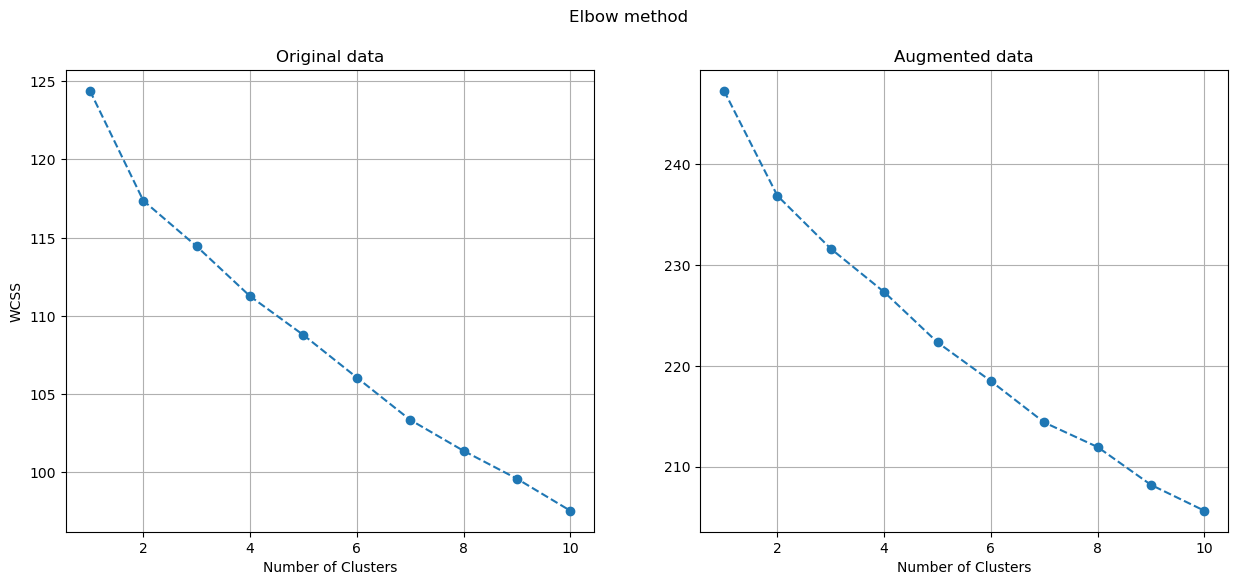

In [32]:
# Perform KMeans clustering for different number of clusters
fig, axs = plt.subplots(1, 2, sharex=True)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_tfidf)
    wcss.append(kmeans.inertia_)

wcss_aug = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_tfidf_aug)
    wcss_aug.append(kmeans.inertia_)

# Plot the elbow method graph
axs[0].plot(range(1, 11), wcss, marker='o', linestyle='--')
axs[1].plot(range(1, 11), wcss_aug, marker='o', linestyle='--')

title = fig.suptitle("Elbow method")
axs[0].title.set_text('Original data')
axs[1].title.set_text('Augmented data')
axs[0].set_ylabel("WCSS")
axs[0].set_xlabel('Number of Clusters')
axs[1].set_xlabel('Number of Clusters')
axs[0].grid(True)
axs[1].grid(True)

In [9]:
X_pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())
X_pca_aug = PCA(n_components=2).fit_transform(X_tfidf_aug.toarray())

In [44]:
k = 3
kmeans = KMeans(
    n_clusters=k,
    max_iter=100,
    n_init=3,
    random_state=42,
).fit(X_tfidf)

kmeans_aug = KMeans(
    n_clusters=k,
    max_iter=100,
    n_init=3,
    random_state=42,
).fit(X_tfidf_aug)


cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
cluster_ids_aug, cluster_sizes_aug = np.unique(kmeans_aug.labels_, return_counts=True)

print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print(f"Number of elements assigned to each cluster, augmented data: {cluster_sizes_aug}")

Number of elements assigned to each cluster: [108   8  14]
Number of elements assigned to each cluster, augmented data: [184  35  41]


In [46]:
# Change these variables before saving figure
title = 'KMeans Clustering of GERMAN Task Descriptions of Cornelsen and EKV_Physik'
fig_name = "clusters_DE.png"

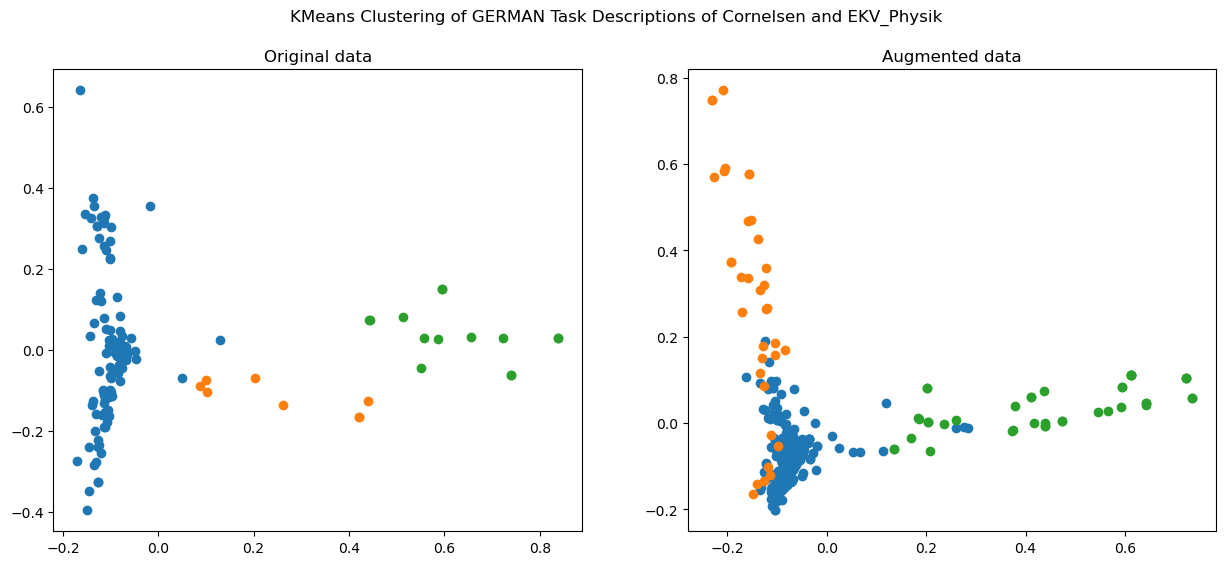

In [47]:
# Plotting
fig, axs = plt.subplots(1, 2)

for cluster in range(k):
    axs[0].scatter(X_pca[kmeans.labels_ == cluster, 0], X_pca[kmeans.labels_ == cluster, 1], label=f'Cluster {cluster+1}')

for cluster in range(k):
    axs[1].scatter(X_pca_aug[kmeans_aug.labels_ == cluster, 0], X_pca_aug[kmeans_aug.labels_ == cluster, 1], label=f'Cluster {cluster+1}')


fig.suptitle(title)
axs[0].title.set_text('Original data')
axs[1].title.set_text('Augmented data')

# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()

In [ ]:
# ax.get_figure().savefig("figures/"+fig_name, bbox_inches="tight") 